# Testing Mistral OCR

In [ ]:
!pip install -q mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 7.2 MB/s eta 0:00:00


In [ ]:
import os
import base64
import requests
from mistralai import Mistral
from google.colab import userdata
from IPython.display import display, Markdown
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mistral_api_key = userdata.get('MISTRAL_API_KEY')

client = Mistral(api_key=mistral_api_key)

## Image OCR

In [ ]:
# Path to your image
image_path = "/content/prescription.png"

In [ ]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0) # gaussian blur to reduce noise.
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2) #adaptive thresholding
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1) #morphological opening
    inverted = cv2.bitwise_not(opening)
    return inverted

<Figure size 1500x2000 with 0 Axes>

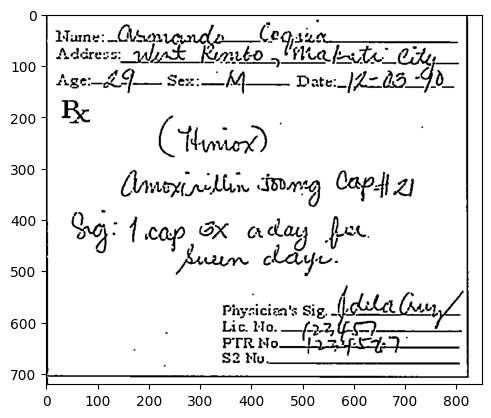

<Figure size 1500x2000 with 0 Axes>

In [ ]:
image = cv2.imread(image_path)
preprocessed_image = preprocess_image(image)
plt.imshow(preprocessed_image, cmap='gray')
plt.figure(figsize=(15,20))

In [ ]:
def encode_image(image_path, preprocess=False):
    """Encode the preprocessed image to base64."""
    try:
        if preprocess:
          # Load the image using OpenCV
          image = cv2.imread(image_path)
          if image is None:
              raise FileNotFoundError(f"Could not read image from {image_path}") #more specific error message.

          # Preprocess the image
          preprocessed_image = preprocess_image(image)

          # Encode the preprocessed image
          _, buffer = cv2.imencode('.png', preprocessed_image) # Use png for lossless encoding
          return base64.b64encode(buffer).decode('utf-8')
        else:
          with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')

    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None
    except Exception as e:
        print(f"Error: {e}")
        return None

In [ ]:
# Getting the base64 string
base64_image = encode_image(image_path, preprocess=False)

In [ ]:
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{base64_image}"
    }
)

In [ ]:
ocr_response

OCRResponse(pages=[OCRPageObject(index=0, markdown="Name: Annamale Cegua Address: West Rembo, Mabate City\nAge: 29 - Sex: M Date: $12-03$ 90\nBx\n(1)Aniox)\n\nAmoxirillin Sormy Cap $4: 21$\nSoj: 1 sap $s x$ aday fex huen dacy.\n\nPhysician's Sig. Jdela Gury Lic. No. 122457\nPTR No. 122457\nS2 No.", images=[], dimensions=OCRPageDimensions(dpi=200, height=721, width=850))], model='mistral-ocr-2503-completion', usage_info=OCRUsageInfo(pages_processed=1, doc_size_bytes=478885))

In [ ]:
display(Markdown(ocr_response.pages[0].markdown))

Name: Annamale Cegua Address: West Rembo, Mabate City
Age: 29 - Sex: M Date: $12-03$ 90
Bx
(1)Aniox)

Amoxirillin Sormy Cap $4: 21$
Soj: 1 sap $s x$ aday fex huen dacy.

Physician's Sig. Jdela Gury Lic. No. 122457
PTR No. 122457
S2 No.

## File OCR

In [ ]:
uploaded_pdf = client.files.upload(
    file={
        "file_name": "uploaded_file.pdf",
        "content": open("/content/mit6_622_s23_lec03_hand.pdf", "rb"),
    },
    purpose="ocr"
)

In [ ]:
client.files.retrieve(file_id=uploaded_pdf.id)

RetrieveFileOut(id='4c479a3a-0d05-42d5-82bd-720806fc931e', object='file', size_bytes=725752, created_at=1741334863, filename='uploaded_file.pdf', purpose='ocr', sample_type='ocr_input', source='upload', deleted=False, num_lines=None)

In [ ]:
signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id)

In [ ]:
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    }
)

In [ ]:
for page in ocr_response.pages:
  display(Markdown(page.markdown))

6.334 Lecture Notes

Land Regulation

Review

METH. ASSUMED STATES

1. Assume a state (on/off) for all switches
2. Calculate voltages/currents in system
3. Check if any switch condition violated
4. If not $\rightarrow$ ok
If so, assume a different set of states

Pecimolic Steady State:

CONverter Waveforms support every cycle

In P.S.S. $\left\langle A_{c}\right\rangle \int=\left(C\left(\frac{d V_{c}}{A}\right)\right)=0$

$$
\left\langle V_{L}\right\rangle \int=\left.L\left(\frac{d A_{L}}{A}\right)\right)=0
$$

Today's Rectifiers + dc-side characteristics.

- Have as short tell? Alternator, isolated dc/dc conv.

Last time we introduced a half-wave rectifier

$$
V_{s S i n}(u t)(\omega) \quad D_{i} \int_{0}^{\infty} V_{x} \quad \frac{1}{2} \frac{1}{V_{d}} \quad \frac{1}{V_{s} \sin (u t)}>0 \rightarrow D_{i} \sin
$$

$V_{s} \sin (u t)<0 \rightarrow D_{2} \sin$

$$
\begin{aligned}
V_{x} & =\left\langle V_{x}\right\rangle \\
& =\frac{1}{\pi \pi} \int_{0}^{\pi} V_{s} \sin (u t) d d
\end{aligned}
$$

$A_{d} \propto I_{d}=\frac{V_{s}}{\pi R}$

(2)

| Now consider adding some ac-side inductance Le (reactance $X_{c} \triangleq \omega L_{c}$ ) |  |
| :--: | :--: |
| This is a relevant issue. Le can be <br> 1. transformer leakage inductance (or paver or obode) <br> 2. generator machine leakage <br> 3. line inductance. |  |
| Typically $L_{d} \gg L_{c}$ (Filter much bigger than leakage) for simplicity, assume $L d \rightarrow \infty$ so load looks like a current-source. |  |
| It is a "special" current source since $\left\langle V_{c}\right\rangle=0$ in P.S.S. |  |
| $\therefore I_{d}=\left\langle V_{s} / e\right\rangle$ |  |
| Simplified mole! <br> Draw voltage cycle on board |  |
| $V_{s} \sin (w t)$ | $\left\{\begin{array}{l} \text { then fill in as we catenly. } \\ \text { I } \end{array}\right.$ |
| Assume we start with $D_{2}$ conducting, $D_{1} \circ f f, V_{s} \sin (w t) \ll 0$, what happens when $V_{s} \sin (w t)$ crosses zero? |  |

# (3) 

G. 334 Lecture Notes
Load Regulation

$$
\begin{aligned}
& \rightarrow D_{1} \text { off is no longer valid }\left(v_{d}>0\right) \therefore D_{1} \text { turns on } \\
& \rightarrow \text { after turn on } A_{1} \text { still }=0 \text { (no instant } d \text { change } \\
& \text { in } L_{c} \text { ) : } D_{2} \text { remains on }
\end{aligned}
$$

![img-0.jpeg](img-0.jpeg)

$$
\begin{aligned}
& L_{c} \frac{d A_{1}}{d t}=V_{s} \sin (u t) \Rightarrow A_{1}=\frac{V_{s}}{\omega L_{c}}\left(\begin{array}{l}
\omega t \\
\sin (u t) d(u t)
\end{array}\right. \\
& A_{1}=\frac{V_{s}}{\omega L_{c}}[\cos (0)-\cos (u t)]=\frac{V_{s}}{\omega L_{c}}[1-\cos (u t)]
\end{aligned}
$$

This is valid until some electrical angle $\omega t=u$, when the current through $D_{2}$ reaches zero $\left(A_{1}=I_{d}\right)$

$$
I_{d}=\frac{V_{s}}{\omega L_{c}}[1-\cos (u)]
$$

![img-1.jpeg](img-1.jpeg)

20.334 Lecture Notes

# Load Regulation 

![img-2.jpeg](img-2.jpeg)

6.334 Lecture Notes

# Load Regulation 

From this we can see:
as load current increases output voltage drops!
![img-3.jpeg](img-3.jpeg)

Paper ckt we get same $\left\langle V_{x}\right\rangle$ as with no Le. As current increases, $N_{0}$ drops. This is known as LOAD REGULATION, and is typically disliked (we often want constant output voltage independent of load.)
we could model this (in an Average sense) as
![img-4.jpeg](img-4.jpeg)

Note: Load regulation is important in many applications.

1. It dominates the performance of automotive a ltemeters
2. It impacts the behavior of dc /dc converters
3. It determines how circuits behave under short-

6.334 Lecture Notes

# Load Regulation 

## Main Points :

1. AC-side reactance in rectifier circuits introduces a commutation interval during which multiple devices are on so current can switch between them. This period is $\mu$ long. For Hu rectifier

$$
\operatorname{Cos} u=\int-\frac{x_{c} \mathcal{L} d}{v_{s}}
$$

2. The commutation period causes the output voltage to be held low during commutation. The longer the commutation, the lower the output voltage.
$\Rightarrow$ This introduces load regulation of the output.

MIT OpenCourseWare
https://ocw.mit.edu

# 6.622 Power Electronics 

Spring 2023
For information about citing these materials or our Terms of Use, visit: https://ocw.mit.edu/terms

In [ ]:
ocr_response

OCRResponse(pages=[OCRPageObject(index=0, markdown="6.334 Lecture Notes\n\nLand Regulation\n\nReview\n\nMETH. ASSUMED STATES\n\n1. Assume a state (on/off) for all switches\n2. Calculate voltages/currents in system\n3. Check if any switch condition violated\n4. If not $\\rightarrow$ ok\nIf so, assume a different set of states\n\nPecimolic Steady State:\n\nCONverter Waveforms support every cycle\n\nIn P.S.S. $\\left\\langle A_{c}\\right\\rangle \\int=\\left(C\\left(\\frac{d V_{c}}{A}\\right)\\right)=0$\n\n$$\n\\left\\langle V_{L}\\right\\rangle \\int=\\left.L\\left(\\frac{d A_{L}}{A}\\right)\\right)=0\n$$\n\nToday's Rectifiers + dc-side characteristics.\n\n- Have as short tell? Alternator, isolated dc/dc conv.\n\nLast time we introduced a half-wave rectifier\n\n$$\nV_{s S i n}(u t)(\\omega) \\quad D_{i} \\int_{0}^{\\infty} V_{x} \\quad \\frac{1}{2} \\frac{1}{V_{d}} \\quad \\frac{1}{V_{s} \\sin (u t)}>0 \\rightarrow D_{i} \\sin\n$$\n\n$V_{s} \\sin (u t)<0 \\rightarrow D_{2} \\sin$\n\n$$\n